**Importing Libraries**

In [48]:
# Pandas for dataframe and data manipulation
import pandas as pd
import numpy as np

# Matplotlib for plotting/visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn import preprocessing
label = preprocessing.LabelEncoder()    # for encoding text data

# For statistical analysis
from scipy import stats
from scipy.stats import ttest_ind

# For data scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA    # dimensionality reduction
from scipy.cluster.hierarchy import linkage, dendrogram

In [49]:
# load the dataset
df_1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/Fiverr/knn_5_imputed_dataset.xlsx")

In [50]:
pathway_pro_82 = [
    "Samples","Gender", "Age_Group", "ABCC6", "ACBD5", "AFG3L2", "AIPL1", "ALMS1", "APOD", "APOE", "ARL2BP", "ARL6", "ARMS2",
    "ARSG", "BBS10", "BBS2", "BEST1", "C2", "C3", "C8orf37", "CABP4", "CACNA1F", "CAPN5",
    "CC2D2A", "CFB", "CFD", "CFHR1", "CHM", "CLCC1", "CLN3", "CLRN1", "CLUAP1", "CNGB3",
    "CNNM4", "COX2", "CYSLT1R", "ESPN", "GRK1", "GUCY2D", "HGSNAT", "HMCN1", "IFT27", "IMPG1",
    "ITM2B", "KLHL7", "LCA5", "LRAT", "LRP5", "LTB4R", "LTE4", "LZTFL1", "MYO7A", "NDP",
    "NEK2", "NPHP1", "NR2E3", "NRL", "PCARE", "PCDH15", "PDE6B", "PDE6C", "PDZD7", "PEX7",
    "POC1B", "PRDM13", "PROM1", "PRPF4", "RB1", "RDH5", "REEP6", "RGR", "RGS9BP", "RLBP1",
    "RP1L1", "RPGR", "SAG", "SDCCAG8", "TIMP3", "TSPAN12", "TTC8", "TUBGCP4", "TUBGCP6",
    "USH2A", "VEGFA", "WDPCP"]


In [51]:
# pathways

Inflammation = ["COX2", "CFB", "CFD", "CFHR1", "TIMP3", "VEGFA", "LTB4R", "LTE4"]

Oxidative_Stress = ["APOD", "APOE", "ARSG", "HMCN1"]

Immunity = ["C2", "C3"]

Apoptosis = ["CAPN5", "TIMP3", "RB1"]

Aging = ["APOE", "ARMS2", "PRPF4", "GRK1"]

Visual_Perception = ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"]

Ciliopathy = ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"]

Lipid_Metabolism = ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"]

Cellular_Transport = ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"]

Signal_Transduction = ["NEK2", "PRDM13", "TSPAN12"]


In [52]:
# Create a new dataset with pathway specific proteins
df_pathway = df_1[pathway_pro_82]

df_inflammation = df_pathway[Inflammation]

# Concatenate the additional columns
df_inflammation = pd.concat([df_pathway[["Samples", "Gender", "Age_Group"]], df_inflammation], axis=1)

In [53]:
df_inflammation.head() # display dataset's 1st 5 rows

,Samples,Gender,Age_Group,COX2,CFB,CFD,CFHR1,TIMP3,VEGFA,LTB4R,LTE4
0,1_50:60_F,Female,50-60,96.0,87.0,80.0,58.0,156.4,73.0,81.0,89.0
1,2_50:60_F,Female,50-60,88.0,95.0,81.0,83.0,159.0,67.0,72.0,78.0
2,3_40:50_F,Female,40-50,81.0,94.0,85.0,74.0,159.0,72.0,70.0,95.0
3,4_40:50_F,Female,40-50,94.0,84.0,85.6,65.0,164.2,71.0,68.0,81.4
4,5_50:60_F,Female,50-60,81.0,88.6,80.4,79.0,160.0,68.0,91.0,96.0


In [54]:
print(df_inflammation.shape)   # dataset rows & columns
df_inflammation.columns        # columns of the dataset

(500, 11)


Index(['Samples', 'Gender', 'Age_Group', 'COX2', 'CFB', 'CFD', 'CFHR1',
       'TIMP3', 'VEGFA', 'LTB4R', 'LTE4'],
      dtype='object')

In [55]:
df_inflammation.info()     # details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Samples    500 non-null    object 
 1   Gender     500 non-null    object 
 2   Age_Group  500 non-null    object 
 3   COX2       500 non-null    float64
 4   CFB        500 non-null    float64
 5   CFD        500 non-null    float64
 6   CFHR1      500 non-null    float64
 7   TIMP3      500 non-null    float64
 8   VEGFA      500 non-null    float64
 9   LTB4R      500 non-null    float64
 10  LTE4       500 non-null    float64
dtypes: float64(8), object(3)
memory usage: 43.1+ KB


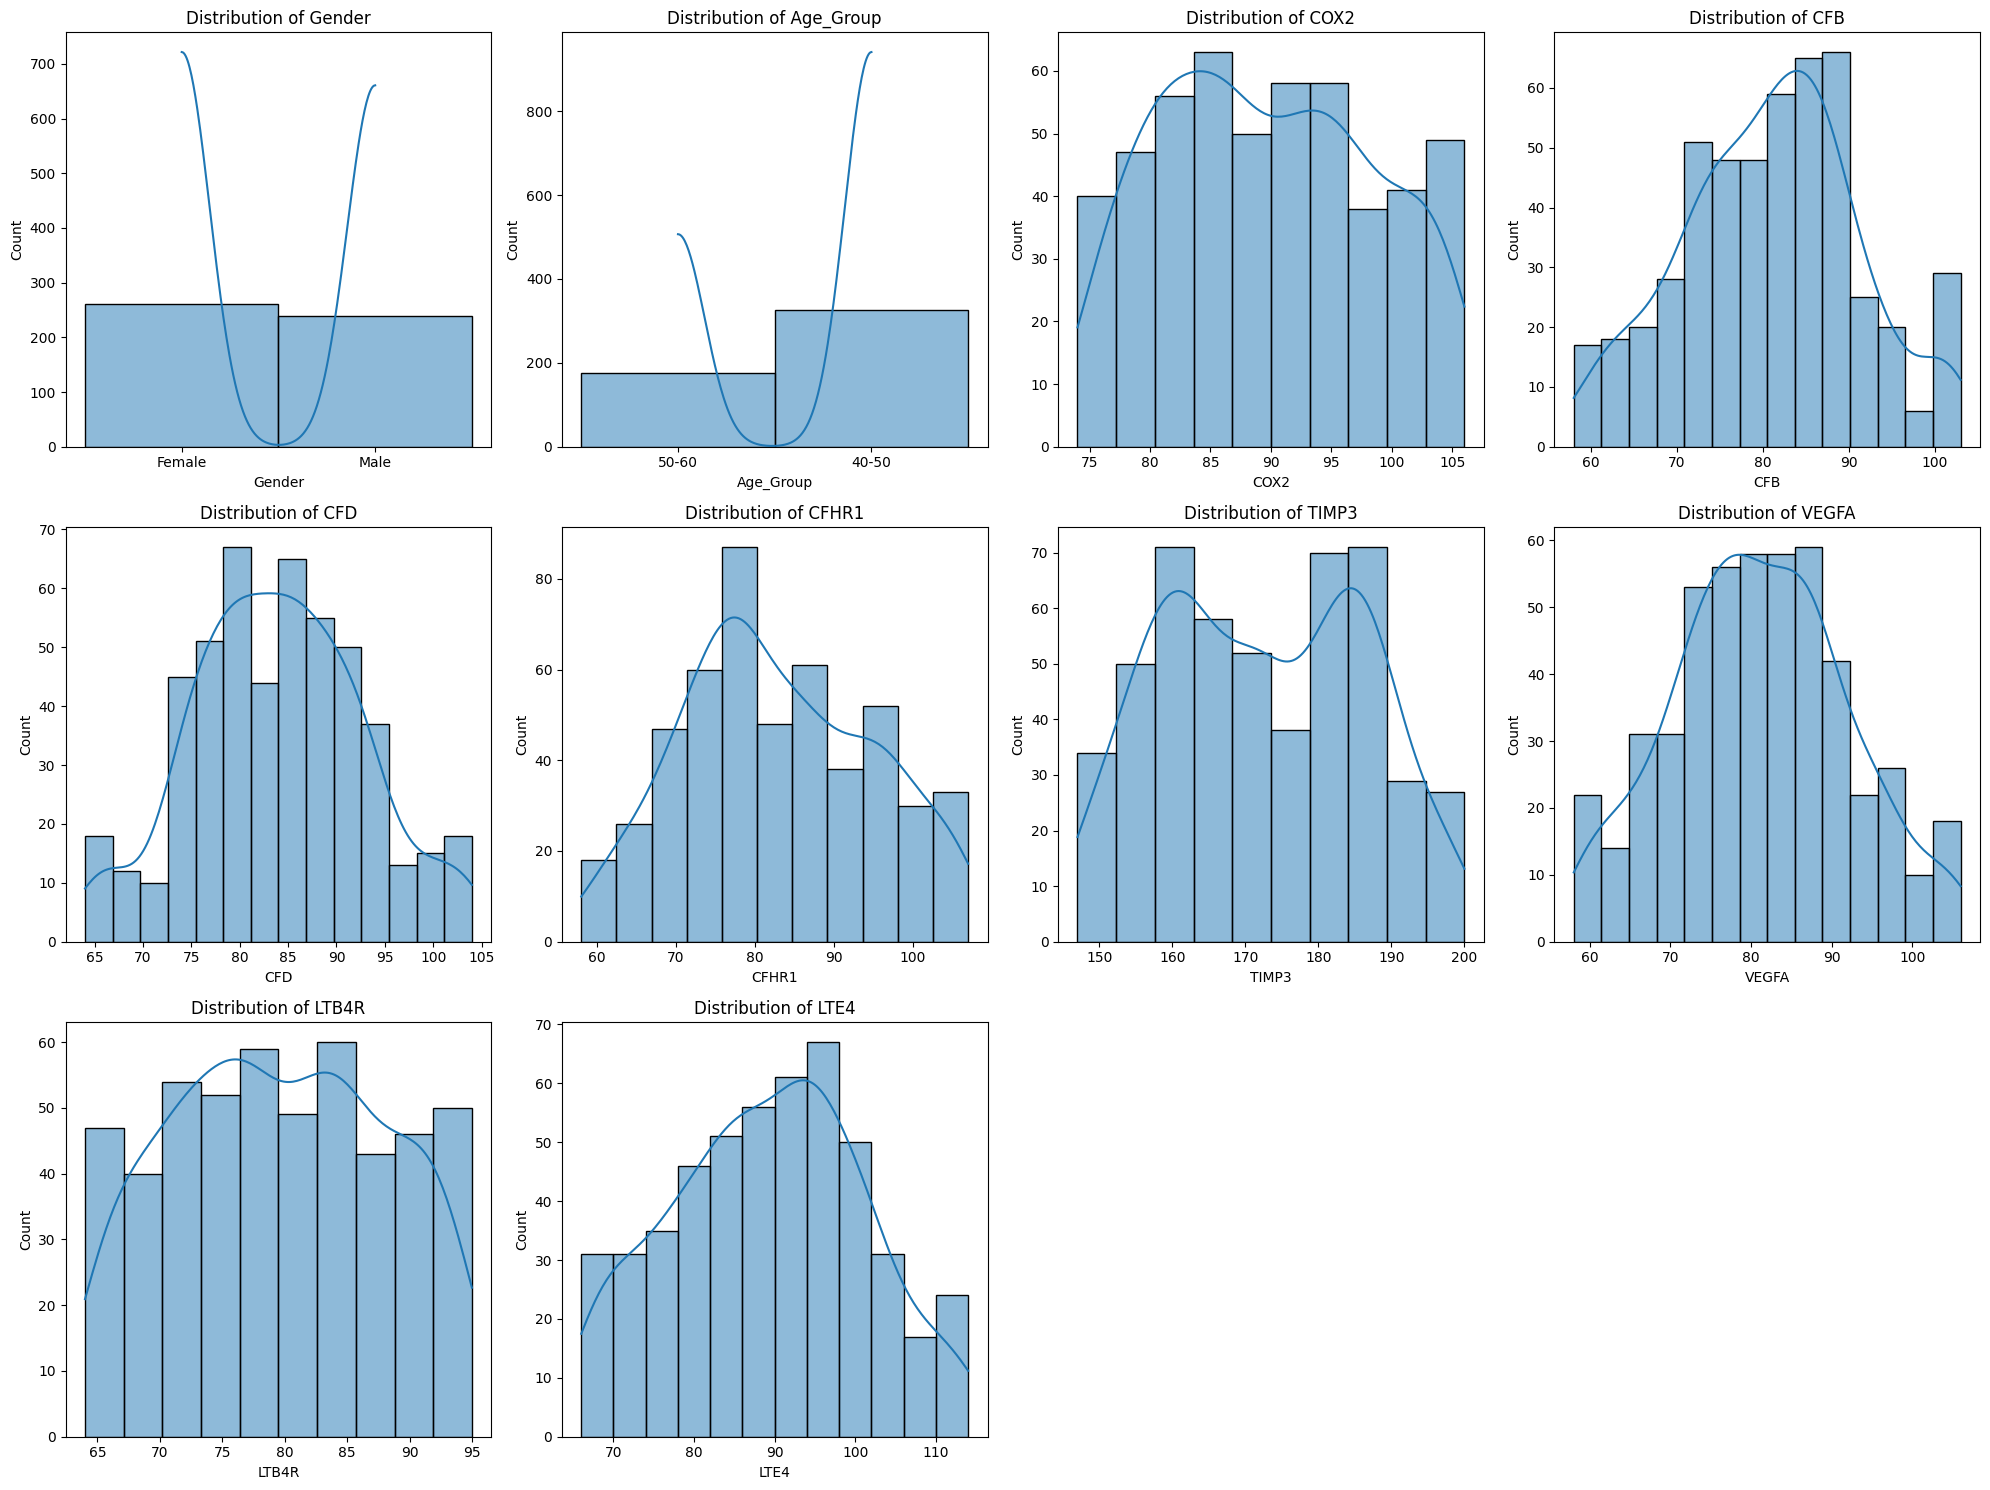

In [56]:
# Data distribution of all columns among the samples
# Number of columns to be plotted
num_columns = len(df_inflammation.columns) - 1  # Subtracting 1 to exclude the first column

# Calculate the number of rows and columns needed
num_cols = 4
num_rows = (num_columns // num_cols) + (num_columns % num_cols != 0)

# Visualize the distribution of each peptide
plt.figure(figsize=(20, num_rows * 5))  # Adjust height based on the number of rows
for i, column in enumerate(df_inflammation.columns[1:], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_inflammation[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

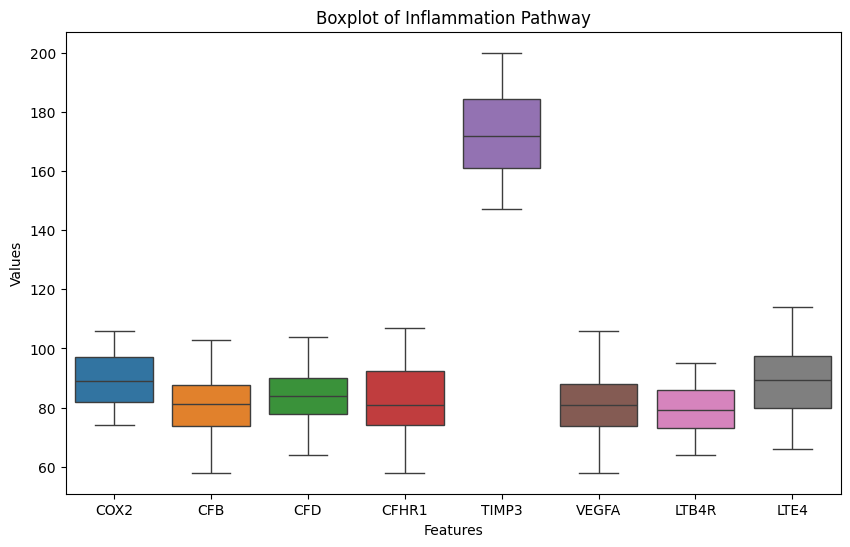

In [57]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_inflammation)

plt.title("Boxplot of Inflammation Pathway")
plt.ylabel("Values")
plt.xlabel("Features")
plt.show()


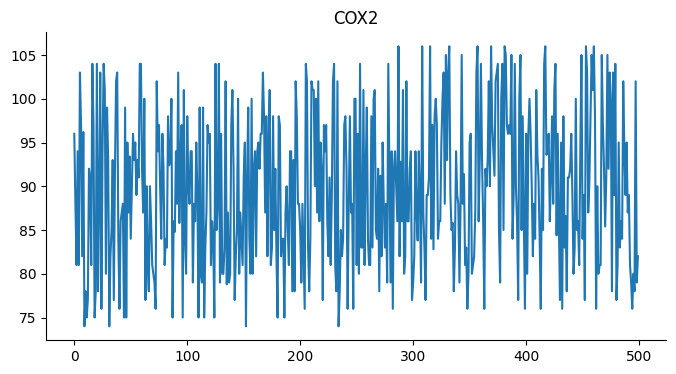

In [58]:
# COX2 in samples

df_pathway['COX2'].plot(kind='line', figsize=(8, 4), title='COX2')
plt.gca().spines[['top', 'right']].set_visible(False)

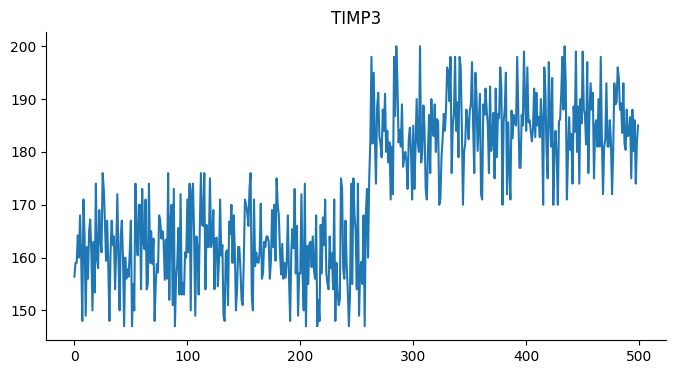

In [59]:
# TIMP3 in samples

df_pathway['TIMP3'].plot(kind='line', figsize=(8, 4), title='TIMP3')
plt.gca().spines[['top', 'right']].set_visible(False)

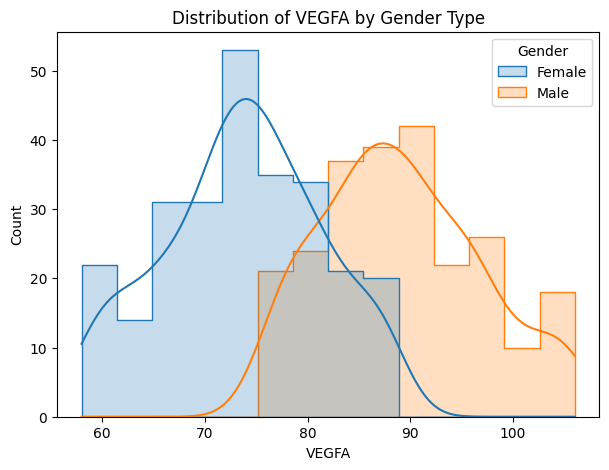

In [60]:
# Distribution plot for 'VEGFA'
plt.figure(figsize=(7, 5))
sns.histplot(data=df_inflammation, x='VEGFA', hue='Gender', kde=True, element="step")
plt.title('Distribution of VEGFA by Gender Type')
plt.show()

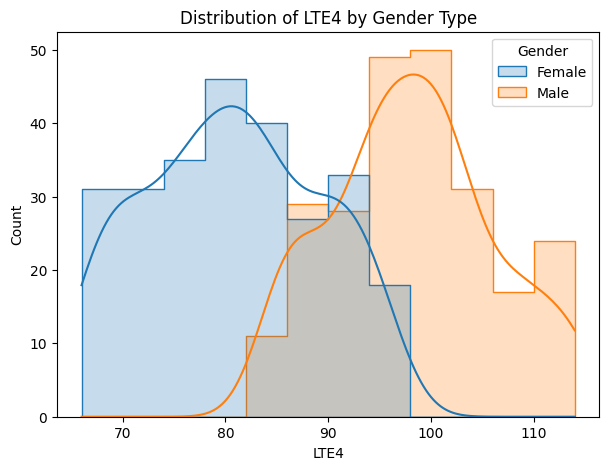

In [61]:
# Distribution plot for LTE4
plt.figure(figsize=(7, 5))
sns.histplot(data=df_pathway, x='LTE4', hue='Gender', kde=True, element="step")
plt.title('Distribution of LTE4 by Gender Type')
plt.show()

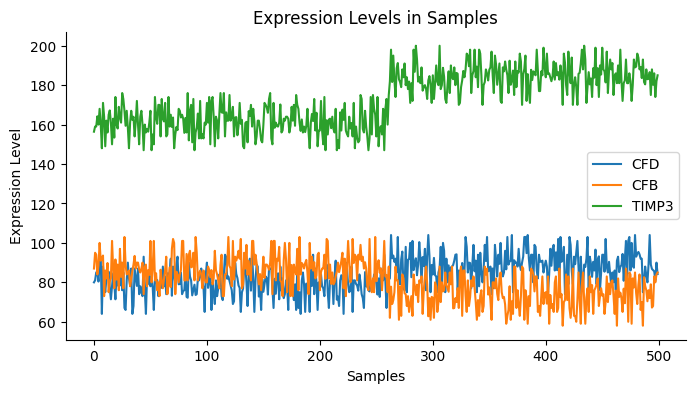

In [62]:
# Plotting proteins
df_inflammation[['CFD', 'CFB', 'TIMP3']].plot(kind='line', figsize=(8, 4), title='Expression Levels in Samples')

# Removing top and right spines for cleaner appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels to x and y axes
plt.xlabel('Samples')
plt.ylabel('Expression Level')

# Displaying the plot
plt.show()


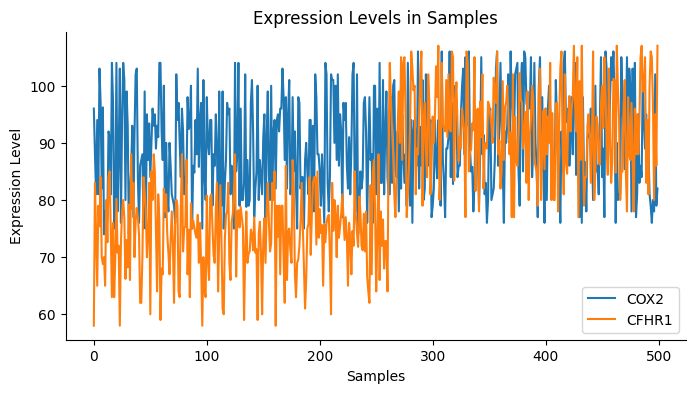

In [63]:
# Plotting proteins
df_inflammation[['COX2', 'CFHR1']].plot(kind='line', figsize=(8, 4), title='Expression Levels in Samples')

# Removing top and right spines for cleaner appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels to x and y axes
plt.xlabel('Samples')
plt.ylabel('Expression Level')

# Displaying the plot
plt.show()


Here, we calculated the frequency of each protein across samples, along with their average concentration (mean) and standard deviation. Additionally, we determined the standard deviation as a percentage of the mean expression, known as the coefficient of variation (CV). This provides a relative measure of the variability in expression levels.

In [64]:
# dictionary to store results for each protein
protein_stats = {}

for protein in df_inflammation.columns[3:]:
    expression_data = df_inflammation[protein]

    # Frequency (percentage of patients expressing the protein)
    frequency = round((expression_data > 0).sum() / len(expression_data) * 100, 3)

    # Spectral Counting Mean (average concentration)
    mean_expression = round(expression_data.mean(), 3)

    # Standard Deviation and Percentage (mean expression)
    std_dev = round(expression_data.std(), 3)
    std_dev_percentage_cv = round((std_dev / mean_expression) * 100, 3) if mean_expression != 0 else np.nan

    # store the results
    protein_stats[protein] = {
        'Frequency (%)': frequency,
        'Mean Expression': mean_expression,
        'Standard Deviation': std_dev,
        'CV (%)': std_dev_percentage_cv
    }

# convert to DataFrame
protein_stats_df = pd.DataFrame(protein_stats).T

In [65]:
protein_stats_df     # columns statistical analysis

,Frequency (%),Mean Expression,Standard Deviation,CV (%)
COX2,100.0,89.730,8.757,9.759
CFB,100.0,80.899,10.211,12.622
CFD,100.0,83.936,8.870,10.568
CFHR1,100.0,82.901,12.050,14.535
TIMP3,100.0,172.420,13.859,8.038
VEGFA,100.0,81.086,10.932,13.482
LTB4R,100.0,79.585,8.545,10.737
LTE4,100.0,89.040,11.968,13.441


In [66]:
df_corr = df_inflammation.iloc[:, 3:]    # correlation among columns
df_corr.corr()

,COX2,CFB,CFD,CFHR1,TIMP3,VEGFA,LTB4R,LTE4
COX2,1.000000,-0.009587,0.118891,0.092157,0.117327,0.107647,0.036708,0.045564
CFB,-0.009587,1.000000,-0.406479,-0.507028,-0.537262,-0.487050,-0.005223,-0.500597
CFD,0.118891,-0.406479,1.000000,0.424377,0.488686,0.352248,0.057063,0.438391
CFHR1,0.092157,-0.507028,0.424377,1.000000,0.672808,0.564296,0.083420,0.594773
TIMP3,0.117327,-0.537262,0.488686,0.672808,1.000000,0.631375,0.069190,0.598913
VEGFA,0.107647,-0.487050,0.352248,0.564296,0.631375,1.000000,0.072401,0.496929
LTB4R,0.036708,-0.005223,0.057063,0.083420,0.069190,0.072401,1.000000,0.010286
LTE4,0.045564,-0.500597,0.438391,0.594773,0.598913,0.496929,0.010286,1.000000


Positive Correlations: Some genes like TIMP3, CFHR1, and VEGFA show strong positive correlations, indicating they may have a cooperative role in the inflammation pathway.

Negative Correlations: CFB shows strong negative correlations with several other genes, possibly indicating a regulatory or antagonistic role.

Independence: LTB4R appears mostly independent, with weak correlations across the board.

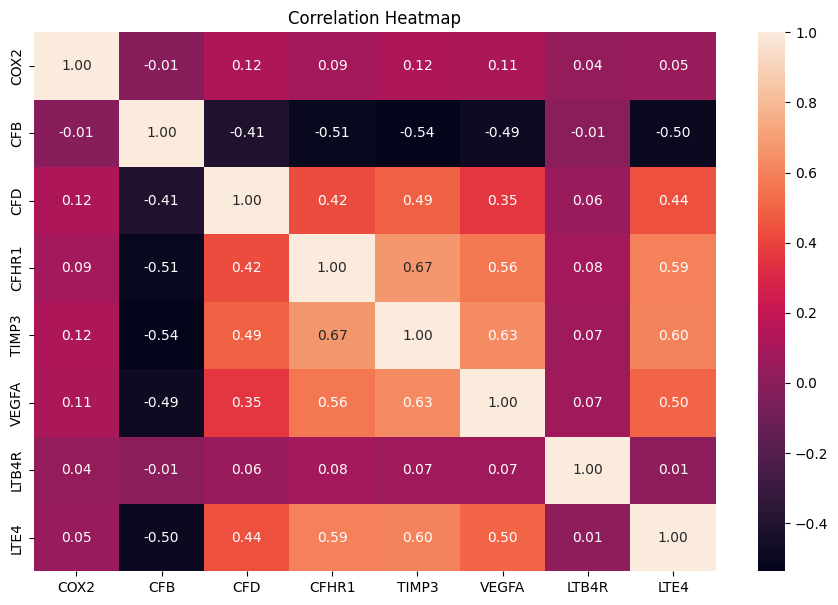

In [67]:
# Correlation Heatmap
plt.figure(figsize=(11, 7))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Performed statistical tests to identify proteins that show significant differences in expression levels between different genders (male and female) and between different age groups (40-50 and 50-60).

In [68]:
# Segregate data by gender and age group
males = df_inflammation[df_inflammation['Gender'] == 'Male']
females = df_inflammation[df_inflammation['Gender'] == 'Female']

age_40_50 = df_inflammation[df_inflammation['Age_Group'] == '40-50']
age_50_60 = df_inflammation[df_inflammation['Age_Group'] == '50-60']

# List to store significant proteins
significant_proteins_gender = []
significant_proteins_age = []

for protein in df_inflammation.columns[3:]:
    # Gender differences (t-test)
    t_stat, p_val_gender = ttest_ind(males[protein], females[protein], nan_policy='omit')
    if p_val_gender < 0.05:
        significant_proteins_gender.append(protein)

    # Age group differences (t-test)
    t_stat, p_val_age = ttest_ind(age_40_50[protein], age_50_60[protein], nan_policy='omit')
    if p_val_age < 0.05:
        significant_proteins_age.append(protein)

print("Proteins with significant differences between genders:", significant_proteins_gender)
print("Proteins with significant differences between age groups:", significant_proteins_age)


Proteins with significant differences between genders: ['COX2', 'CFB', 'CFD', 'CFHR1', 'TIMP3', 'VEGFA', 'LTE4']
Proteins with significant differences between age groups: []


In [69]:
print('Number of significant proteins:', len(significant_proteins_gender))      # The proteins CFD, CFHR1, VEGFA, and LTE4 may play a role in sex-specific biological
                                                                                # processes or may be expressed differently due to hormonal or genetic factors
                                                                                # that differ between males and females.
print('Number of significant proteins:', len(significant_proteins_age))

Number of significant proteins: 7
Number of significant proteins: 0


In [70]:
# Convert Gender and Age_Group columns to categorical type
df_1['Gender'] = df_1['Gender'].astype('category')
df_1['Age_Group'] = df_1['Age_Group'].astype('category')

# pathway dictionary
pathways = {
    "Inflammation": ["COX2", "CFB", "CFD", "CFHR1", "TIMP3", "VEGFA", "LTB4R", "LTE4"],
    "Oxidative_Stress": ["APOD", "APOE", "ARSG", "HMCN1"],
    "Immunity": ["C2", "C3"],
    "Apoptosis": ["CAPN5", "TIMP3", "RB1"],
    "Aging": ["APOE", "ARMS2", "PRPF4", "GRK1"],
    "Visual_Perception": ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"],
    "Ciliopathy": ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"],
    "Lipid_Metabolism": ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"],
    "Cellular_Transport": ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"],
    "Signal_Transduction": ["NEK2", "PRDM13", "TSPAN12"]
}

# Select the pathway to analyze
selected_pathway = "Inflammation"  # Change this to analyze a different pathway

# Subset the DataFrame for the selected pathway
proteins = pathways[selected_pathway]
df_pathway_stat = df_1[proteins + ['Gender', 'Age_Group']]

# Summary statistics for the selected pathway
summary_stats = df_pathway_stat.groupby(['Gender', 'Age_Group'])[proteins].agg(['mean', 'median', 'std'])
print(f"Summary Statistics for {selected_pathway} Pathway:")
print(summary_stats)


Summary Statistics for Inflammation Pathway:
                       COX2                         CFB                   \
                       mean median       std       mean median       std   
Gender Age_Group                                                           
Female 40-50      89.720455   91.0  8.644683  86.896591   86.2  7.714209   
       50-60      87.202353   86.0  8.523944  87.378824   87.8  7.953258   
Male   40-50      90.332886   90.0  8.641997  74.146309   74.0  8.163486   
       50-60      91.137778   90.2  9.028775  74.228889   73.9  8.030143   

                        CFD                       CFHR1  ...     TIMP3  \
                       mean median       std       mean  ...       std   
Gender Age_Group                                         ...             
Female 40-50      79.267045   80.0  7.245684  73.938636  ...  7.620117   
       50-60      79.051765   79.0  6.631394  73.851765  ...  7.235404   
Male   40-50      89.324832   89.4  8.004002  93.257

<ipython-input-70-5bfec343544a>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_pathway_stat.groupby(['Gender', 'Age_Group'])[proteins].agg(['mean', 'median', 'std'])


In [71]:
# # Display summary statistics as a DataFrame
# summary_stats_df = pd.DataFrame(summary_stats)
# display(summary_stats_df)

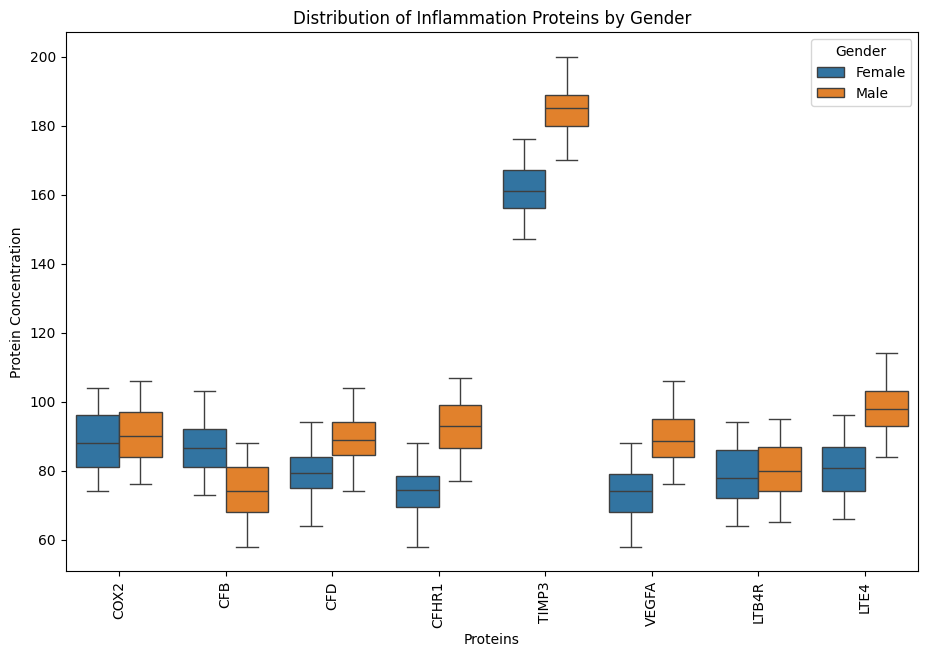

In [72]:
# Visualization: Distribution by Gender
plt.figure(figsize=(11, 7))
sns.boxplot(data=df_pathway.melt(id_vars=['Gender', 'Age_Group'], value_vars=proteins),
            x='variable', y='value', hue='Gender')
plt.title(f"Distribution of {selected_pathway} Proteins by Gender")
plt.xticks(rotation=90)
plt.ylabel("Protein Concentration")
plt.xlabel("Proteins")
plt.show()

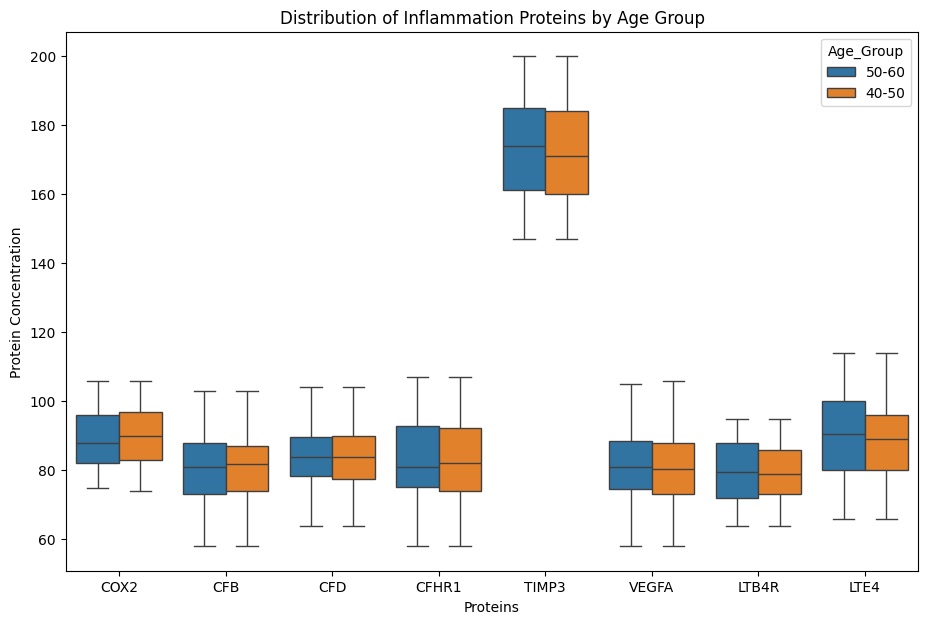

In [73]:
# Visualization: Distribution by Age Group
plt.figure(figsize=(11, 7))
sns.boxplot(data=df_pathway.melt(id_vars=['Gender', 'Age_Group'], value_vars=proteins),
            x='variable', y='value', hue='Age_Group')
plt.title(f"Distribution of {selected_pathway} Proteins by Age Group")
# plt.xticks(rotation=90)
plt.ylabel("Protein Concentration")
plt.xlabel("Proteins")
plt.show()

Here, we normalized the spectral counting data and categorized the proteins based on their expression levels.

In [74]:
p_columns = df_inflammation.columns[3:]  # protein columns

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized = df_inflammation.copy()
df_normalized[p_columns] = scaler.fit_transform(df_inflammation[p_columns])

# Categorize proteins
def categorize_expression_level(value):
    if value >= 0.7:
        return 'Highly Expressed'
    elif value <= 0.3:
        return 'Lowly Expressed'
    else:
        return 'Moderately Expressed'

# Apply categorization to each protein column
df_categorized = df_normalized.copy()
for col in p_columns:
    df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

# categorization results
summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
summary = summary.transpose()

# Display the summary
print(summary)

       Highly Expressed  Lowly Expressed  Moderately Expressed
COX2                128              143                   229
CFB                  92               91                   317
CFD                  96               89                   315
CFHR1               127              104                   269
TIMP3               127              155                   218
VEGFA                83              111                   306
LTB4R               139              141                   220
LTE4                100              126                   274


In [75]:
# convert the result summary in a DataFrame
summary_df = summary.reset_index()
summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']
summary_df

,Protein,Highly Expressed,Lowly Expressed,Moderately Expressed
0,COX2,128,143,229
1,CFB,92,91,317
2,CFD,96,89,315
3,CFHR1,127,104,269
4,TIMP3,127,155,218
5,VEGFA,83,111,306
6,LTB4R,139,141,220
7,LTE4,100,126,274


In [76]:
# Function to normalize and categorize proteins
def normalize_and_categorize(df, p_columns):
    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[p_columns] = scaler.fit_transform(df[p_columns])

    # Apply categorization to each protein column
    df_categorized = df_normalized.copy()
    for col in p_columns:
        df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

    # Summarize the categorization results
    summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
    summary = summary.transpose()

    # Convert the result summary into a DataFrame
    summary_df = summary.reset_index()
    summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']
    return summary_df

# Normalize and categorize for Male
summary_male_df = normalize_and_categorize(males, p_columns)

# Normalize and categorize for Female
summary_female_df = normalize_and_categorize(females, p_columns)

# Display the results
print("Summary for Males:")
print(summary_male_df)

print("\nSummary for Females:")
print(summary_female_df)

Summary for Males:
  Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0    COX2                65               69                   105
1     CFB                76               47                   116
2     CFD                48               53                   138
3   CFHR1                67               52                   120
4   TIMP3                44               48                   147
5   VEGFA                41               72                   126
6   LTB4R                69               56                   114
7    LTE4                50               58                   131

Summary for Females:
  Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0    COX2                72               84                   105
1     CFB                53               72                   136
2     CFD                54               49                   158
3   CFHR1                61               44                   156
4   TIMP3            

In [77]:
# Normalize and categorize for Age 40-50
summary_age_40_50_df = normalize_and_categorize(age_40_50, p_columns)

# Normalize and categorize for Age 50-60
summary_age_50_60_df = normalize_and_categorize(age_50_60, p_columns)

# Display the results
print("Summary for Age 40-50:")
print(summary_age_40_50_df)

print("\nSummary for Age 50-60:")
print(summary_age_50_60_df)

Summary for Age 40-50:
  Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0    COX2                87               86                   152
1     CFB                58               55                   212
2     CFD                65               62                   198
3   CFHR1                82               70                   173
4   TIMP3                80              103                   142
5   VEGFA                52               75                   198
6   LTB4R                83               87                   155
7    LTE4                55               82                   188

Summary for Age 50-60:
  Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0    COX2                41               66                    68
1     CFB                34               36                   105
2     CFD                31               27                   117
3   CFHR1                45               34                    96
4   TIMP3      

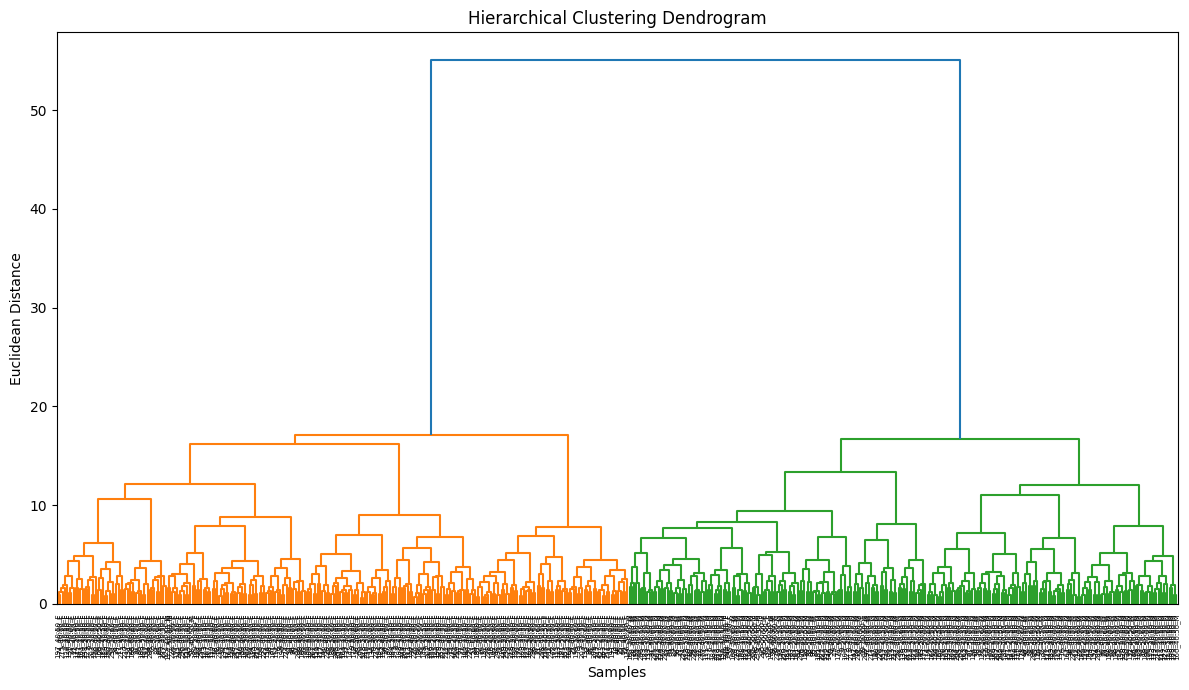

In [78]:
# Select only the protein columns for clustering
protein_columns = ['COX2', 'CFB', 'CFD', 'CFHR1', 'TIMP3', 'VEGFA', 'LTB4R', 'LTE4']
df_proteins = df_inflammation[protein_columns]

# Standardize the data
ss_scaler = StandardScaler()
df_proteins_scaled = ss_scaler.fit_transform(df_proteins)

# Perform hierarchical clustering
linkage_matrix = linkage(df_proteins_scaled, method='ward')

# Create a dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linkage_matrix, labels=df_inflammation['Samples'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [79]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 2  # Adjust this number as needed
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Create a DataFrame to easily view the sample names with their corresponding clusters
df_clusters_d = pd.DataFrame({
    'Sample': df_inflammation['Samples'],
    'Cluster': cluster_labels
})

# Group the samples by their cluster
clusters = df_clusters_d.groupby('Cluster')['Sample'].apply(list).to_dict()

# Print each cluster as a list
for cluster_id, samples in clusters.items():
    print(f"Cluster {cluster_id}: {samples}\n")

Cluster 1: ['39_50:60_F', '45_40:50_F', '55_40:50_F', '69_50:60_F', '118_40:50_F', '205_50:60_F', '246_40:50_F', '248_40:50_F', '249_40:50_F', '1_50:60_M', '2_40:50_M', '3_40:50_M', '4_40:50_M', '5_50:60_M', '6_40:50_M', '8_40:50_M', '9_50:60_M', '10_40:50_M', '11_40:50_M', '12_40:50_M', '13_50:60_M', '14_40:50_M', '15_50:60_M', '16_40:50_M', '17_40:50_M', '18_50:60_M', '19_40:50_M', '20_40:50_M', '21_50:60_M', '22_40:50_M', '23_40:50_M', '24_50:60_M', '25_40:50_M', '26_40:50_M', '27_50:60_M', '28_40:50_M', '29_40:50_M', '30_50:60_M', '31_40:50_M', '32_40:50_M', '33_50:60_M', '34_40:50_M', '35_50:60_M', '36_40:50_M', '37_40:50_M', '38_50:60_M', '39_40:50_M', '40_40:50_M', '41_50:60_M', '42_40:50_M', '43_50:60_M', '44_40:50_M', '45_40:50_M', '46_50:60_M', '47_50:60_M', '48_40:50_M', '49_50:60_M', '50_40:50_M', '52_50:60_M', '53_40:50_M', '54_40:50_M', '55_50:60_M', '56_40:50_M', '57_40:50_M', '58_50:60_M', '59_40:50_M', '60_40:50_M', '61_50:60_M', '62_40:50_M', '63_50:60_M', '64_40:50_M

In [80]:
cluster_counts = df_clusters_d['Cluster'].value_counts()
cluster_counts

,count
Cluster,
2,255
1,245


Performed clustering to identify natural groupings or patterns in our data. We used K-means algorithm and Elbow method to determine the optimal number of clusters by plotting the Within-Cluster Sum of Square (WCSS) against different numbers of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

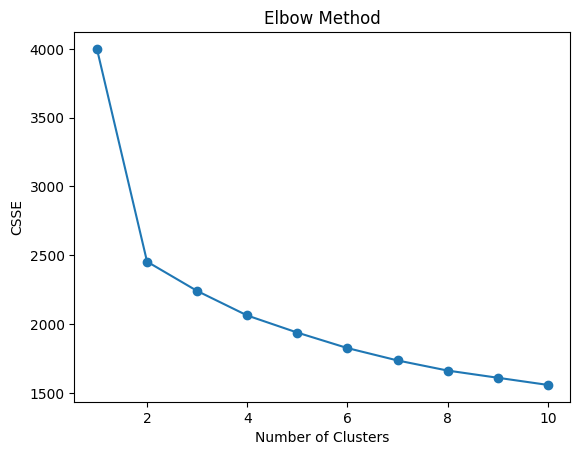

In [81]:
pro_columns = df_inflammation.columns[3:]

# Data Standardization/Normalization
s_scaler = StandardScaler()
# m_scaler = MinMaxScaler()
X = s_scaler.fit_transform(df_inflammation[pro_columns])

k_rang = range(1, 11)
csse = []

for k in k_rang:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    csse.append(kmeans.inertia_)    # sum of square error

# Plotting the Elbow Curve
plt.plot(k_rang, csse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CSSE')
plt.show()

In [82]:
csse

[3999.9999999999995,
 2453.4594376038976,
 2240.327465646721,
 2062.0176400035593,
 1937.6493597860085,
 1824.9887161403258,
 1735.1167055207407,
 1661.535437029582,
 1609.3274977943017,
 1557.2176110698579]

In [83]:
# K-means Clustering (optimal k based on the Elbow plot)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X)
print(clusters)

# Add cluster labels to the DataFrame
df_cluster = df_inflammation.copy()
df_cluster['Cluster'] = clusters

# print the DataFrame
df_cluster

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Samples,Gender,Age_Group,COX2,CFB,CFD,CFHR1,TIMP3,VEGFA,LTB4R,LTE4,Cluster
0,1_50:60_F,Female,50-60,96.0,87.0,80.0,58.0,156.4,73.0,81.0,89.0,1
1,2_50:60_F,Female,50-60,88.0,95.0,81.0,83.0,159.0,67.0,72.0,78.0,1
2,3_40:50_F,Female,40-50,81.0,94.0,85.0,74.0,159.0,72.0,70.0,95.0,1
3,4_40:50_F,Female,40-50,94.0,84.0,85.6,65.0,164.2,71.0,68.0,81.4,1
4,5_50:60_F,Female,50-60,81.0,88.6,80.4,79.0,160.0,68.0,91.0,96.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,235_50:60_M,Male,50-60,80.0,68.0,86.2,97.0,180.2,87.0,78.2,90.0,0
496,236_40:50_M,Male,40-50,78.0,83.0,85.6,80.0,186.0,88.4,80.0,97.0,0
497,237_50:60_M,Male,50-60,102.0,80.0,81.0,95.0,174.0,96.0,71.0,109.0,0
498,238_40:50_M,Male,40-50,79.0,84.0,90.0,86.0,182.0,78.0,77.0,112.0,0


In [84]:
# Group the DataFrame by the 'Cluster' column
clustered_samples = df_cluster.groupby('Cluster')['Samples'].apply(list)

# Print the sample names for each cluster
for cluster, samples in clustered_samples.items():
    print(f"Cluster {cluster}:")
    print(samples)
    print("\n")


Cluster 0:
['248_40:50_F', '249_40:50_F', '1_50:60_M', '2_40:50_M', '3_40:50_M', '4_40:50_M', '5_50:60_M', '6_40:50_M', '7_50:60_M', '8_40:50_M', '9_50:60_M', '10_40:50_M', '11_40:50_M', '12_40:50_M', '13_50:60_M', '14_40:50_M', '15_50:60_M', '16_40:50_M', '17_40:50_M', '18_50:60_M', '19_40:50_M', '20_40:50_M', '21_50:60_M', '22_40:50_M', '23_40:50_M', '24_50:60_M', '25_40:50_M', '26_40:50_M', '27_50:60_M', '28_40:50_M', '29_40:50_M', '30_50:60_M', '31_40:50_M', '32_40:50_M', '33_50:60_M', '34_40:50_M', '35_50:60_M', '36_40:50_M', '37_40:50_M', '38_50:60_M', '39_40:50_M', '40_40:50_M', '41_50:60_M', '42_40:50_M', '43_50:60_M', '44_40:50_M', '45_40:50_M', '46_50:60_M', '47_50:60_M', '48_40:50_M', '49_50:60_M', '50_40:50_M', '51_40:50_M', '52_50:60_M', '53_40:50_M', '54_40:50_M', '56_40:50_M', '57_40:50_M', '58_50:60_M', '59_40:50_M', '60_40:50_M', '61_50:60_M', '62_40:50_M', '63_50:60_M', '64_40:50_M', '65_50:60_M', '66_40:50_M', '67_50:60_M', '68_40:50_M', '69_50:60_M', '70_40:50_M', '

In [85]:
# kmeans.cluster_centers_

df_cluster.value_counts('Cluster')

,count
Cluster,
1,261
0,239


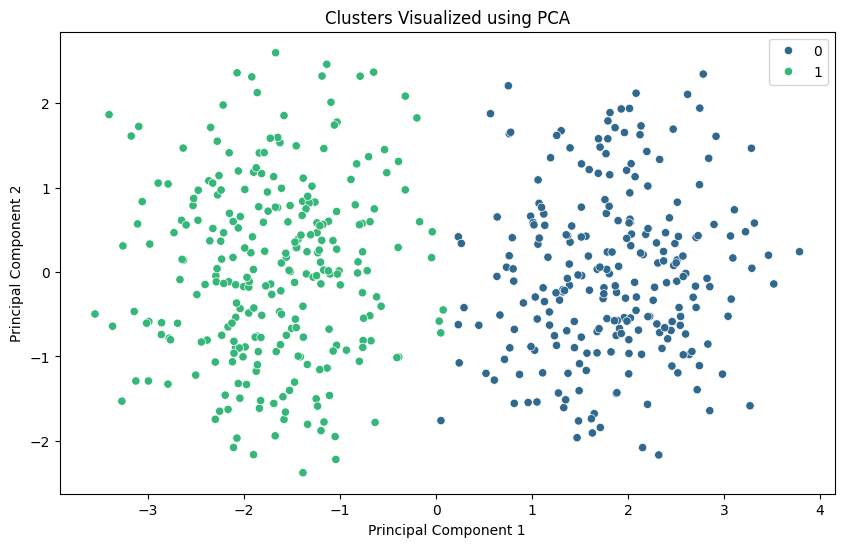

In [86]:
# Visualize the Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

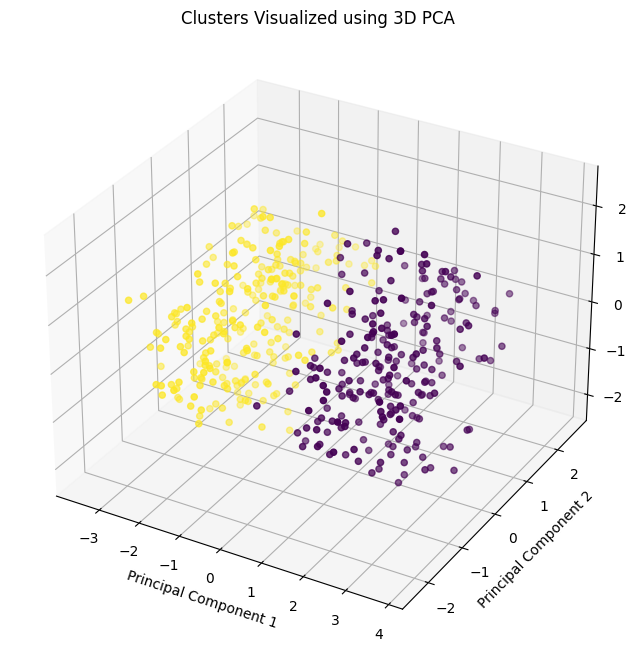

In [87]:
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis')
ax.set_title('Clusters Visualized using 3D PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
